<a href="https://colab.research.google.com/github/JavZon/Loan_Eligibility_Prediction/blob/main/Loan_Status_Pred_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


As we see from df there are some columns that need to be explained.

**CIBIL_Score** : is a three-digit numeric summary of a borrower's credit history and a reflection of the person's credit profile.

**Residential_Assets_Value** : The value of residential properties owned by the applicant.

**Commercial_Assets_Value** : The value of commercial properties owned by the applicant.

**Luxury_Assets_Value** : The value of luxury assets owned by the applicant, such as high-end vehicles, jewelry, or other luxury goods.

**Bank_Asset_Value** : The total value of liquid assets held by the applicant in bank accounts, such as savings, fixed deposits, and other liquid financial instruments.

We will check initial informations about our dataset

In [3]:
df.shape

(4269, 13)

In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

As we see the columns of df has a placeholder in the beginning, so we need to remove it

In [5]:
df.columns=df.columns.str.strip()

In [6]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['no_of_dependents'].value_counts()

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

In [12]:
df['education'].value_counts()

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [13]:
df['self_employed'].value_counts()

self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [14]:
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

We will see df with visual connections

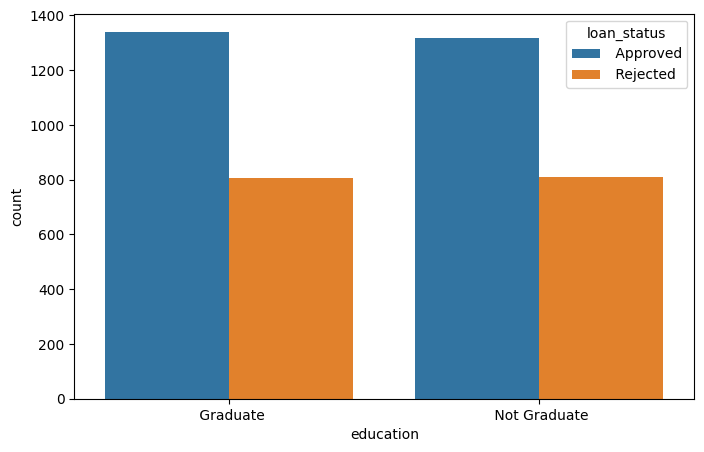

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='education',hue='loan_status',data=df)
plt.show()

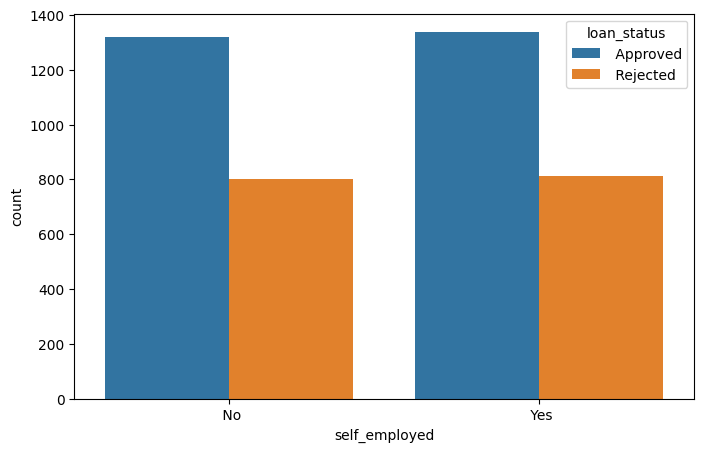

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='self_employed',hue='loan_status',data=df)
plt.show()

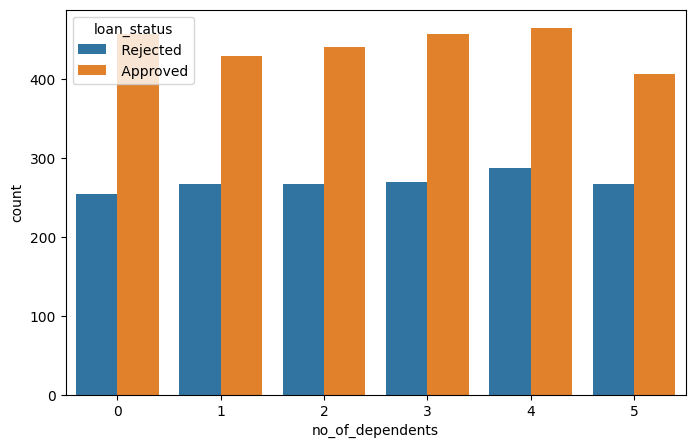

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='no_of_dependents',hue='loan_status',data=df)
plt.show()

Now we change object type columns into integer or float.

In [18]:
df.at[4, 'education']

' Not Graduate'

As we can see at the beginning of the words there is place holder.So we remove them

In [19]:
df['education']=df['education'].str.strip()
df['self_employed']=df['self_employed'].str.strip()
df['loan_status']=df['loan_status'].str.strip()

In [20]:
df.at[42, 'education']

'Graduate'

Now we change categorical values to numerical

In [21]:
df=df.replace({'education' : {'Graduate':1 ,'Not Graduate':0},
               'self_employed': {'Yes':1, 'No':0},
               'loan_status': {'Approved':1, 'Rejected':0}
               })

In [22]:
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
841,842,0,1,1,8300000,30000000,4,600,14600000,12500000,24800000,12000000,1
1406,1407,4,1,0,7900000,31400000,8,698,16500000,11400000,28700000,5100000,1
2866,2867,3,0,1,1000000,3700000,8,725,3000000,1300000,4000000,1300000,1
655,656,3,0,0,9500000,20400000,14,376,2300000,6600000,25900000,8400000,0
1949,1950,1,0,0,6200000,21100000,10,467,15600000,10500000,23500000,5300000,0


And now we split our df into train and test sets

In [23]:
from sklearn.model_selection import train_test_split

Train_set,Test_set=train_test_split(df, test_size=0.2, random_state=11)

print(len(Train_set))
print(len(Test_set))

3415
854


In [24]:
Train_set.head(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1899,1900,1,1,0,500000,1300000,6,670,1000000,500000,1400000,700000,1
1767,1768,5,1,1,200000,400000,18,822,200000,300000,600000,300000,1


We assign X_train and Y_train_label

In [25]:
X_train=Train_set.drop(columns=['loan_id','loan_status'])
Y_train_label=Train_set['loan_status'].copy()

print(X_train.head(2))
print(Y_train_label.head(2))

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
1899                 1          1              0        500000      1300000   
1767                 5          1              1        200000       400000   

      loan_term  cibil_score  residential_assets_value  \
1899          6          670                   1000000   
1767         18          822                    200000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
1899                   500000              1400000            700000  
1767                   300000               600000            300000  
1899    1
1767    1
Name: loan_status, dtype: int64


The same will be done for Test_set

In [26]:
Test_set.head(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2801,2802,3,1,1,4400000,10000000,8,875,5900000,5200000,11700000,4100000,1
2834,2835,2,0,0,2000000,4300000,16,497,5100000,200000,5700000,2800000,0


In [27]:
X_test=Test_set.drop(columns=['loan_id','loan_status'])
Y_test_label=Test_set['loan_status'].copy()

print(X_test.head(2))
print(Y_test_label.head(2))

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
2801                 3          1              1       4400000     10000000   
2834                 2          0              0       2000000      4300000   

      loan_term  cibil_score  residential_assets_value  \
2801          8          875                   5900000   
2834         16          497                   5100000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
2801                  5200000             11700000           4100000  
2834                   200000              5700000           2800000  
2801    1
2834    0
Name: loan_status, dtype: int64


We import **SVC** from **svm**

In [43]:
from sklearn.svm import SVC

loan_classifier=SVC(kernel='linear')

We train our **X_train** on our model

In [34]:
loan_classifier.fit(X_train,Y_train_label)

SVC()

Once we trained our model, now it is time to predict **loan_eligibility** for both **train** and **test** datasets.

In [35]:
X_train_prediction=loan_classifier.predict(X_train)

We check accuracy of our train_prediction

In [36]:
from sklearn.metrics import accuracy_score

X_train_accuracy=accuracy_score(X_train_prediction,Y_train_label)
print(X_train_accuracy)

0.619619326500732


We predict test_set and then check the accuracy of our prediction

In [37]:
X_test_prediction=loan_classifier.predict(X_test)

In [38]:
X_test_accuracy=accuracy_score(X_test_prediction,Y_test_label)
print(X_test_accuracy)

0.6323185011709602


Now we use cross_validation for checking accuracy

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
df.head(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0


In [41]:
X=df.drop(columns=['loan_id','loan_status'])
Y=df['loan_status'].copy()